# **Task 2:**

# Predictive Modeling With Linear Regression

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display the column names
print(data.columns)


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# 2. Preprocess the Data

In [12]:
# Replace feature_column and target_column with actual column name
feature_column = 'Votes'
target_column = 'Aggregate rating'

# Select features and target variable
X = data[[feature_column]]
y = data[target_column]

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values in the selected columns
data = data.dropna(subset=[feature_column, target_column])

# Update X and y after handling missing values
X = data[[feature_column]]
y = data[target_column]

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# 3: Split the Data into Training and Testing Sets

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")


Data split into training and testing sets successfully.


# 4: Train the Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


# 5: Make Predictions and Evaluate the Model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 2.0568524147519573
R-squared: 0.09632955912524821


# 6: Visualize the Results

**1.Regression Line and Actual vs. Predicted Values**

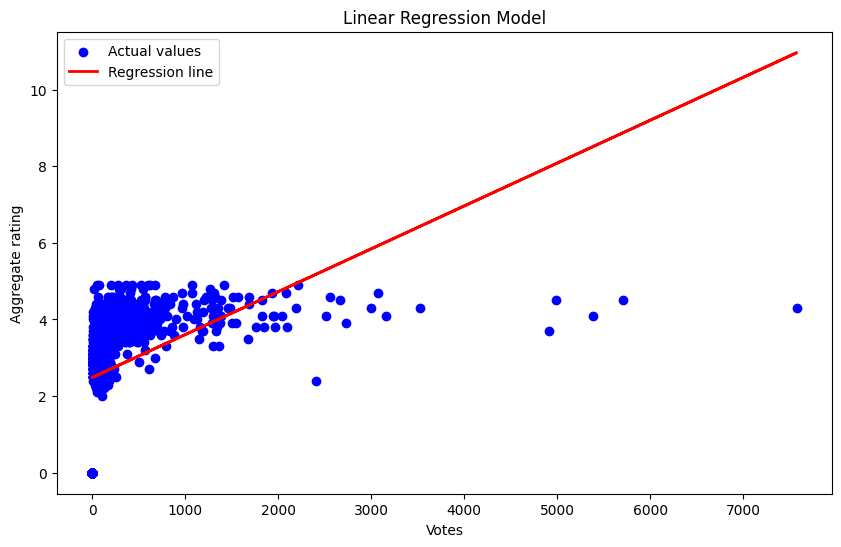

In [16]:
import matplotlib.pyplot as plt

# Plot the regression line and the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of the actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.title('Linear Regression Model')
plt.legend()
plt.show()


**2.Residual Plot**

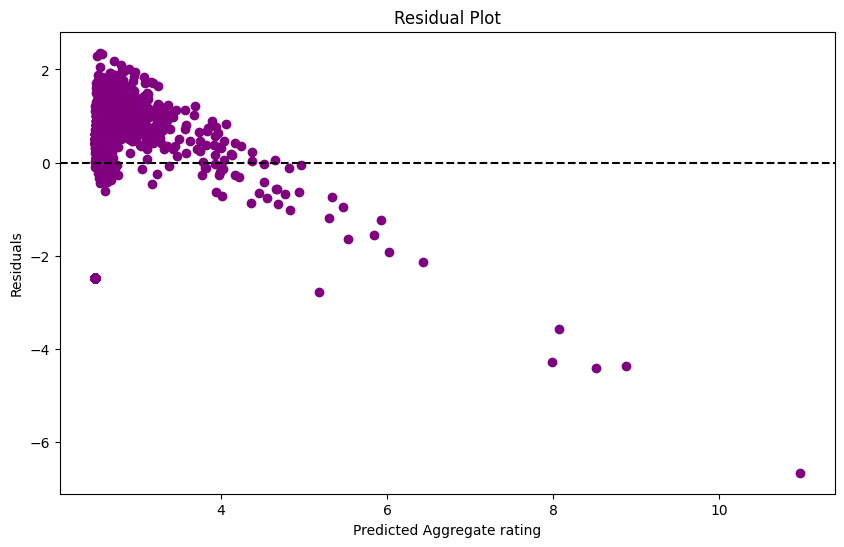

In [17]:
# Residual plot to check for patterns in the residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted ' + target_column)
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**3.Actual vs. Predicted Values Plot**

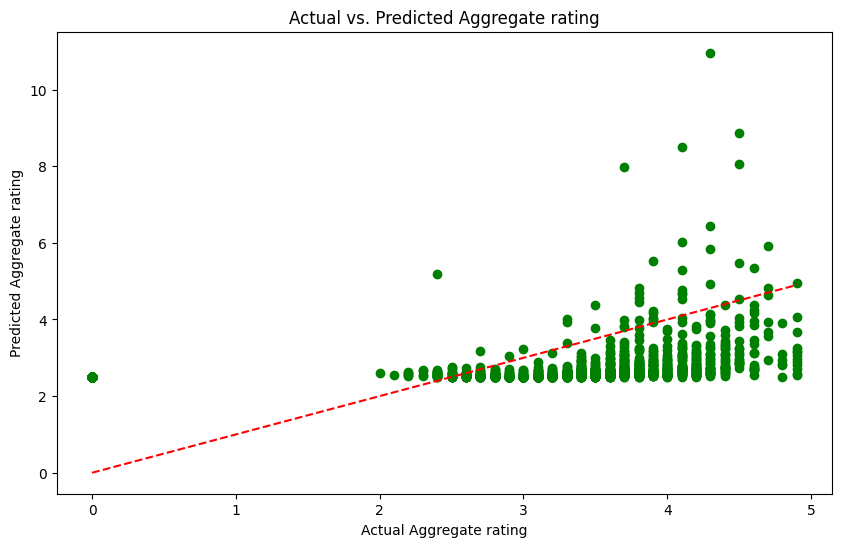

In [18]:
# Actual vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual ' + target_column)
plt.ylabel('Predicted ' + target_column)
plt.title('Actual vs. Predicted ' + target_column)
plt.show()
